In [1]:
# Importation des Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Importation des Algorithmes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Importation des Metriques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 1. Charger les donnees

In [2]:
data = pd.read_csv('data/LoanApprovalPrediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. EDA : Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [4]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
data['Gender'].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

In [6]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [8]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [10]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [11]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

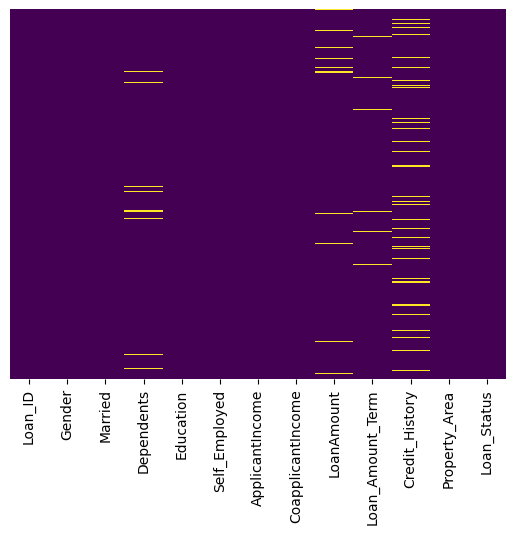

In [12]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [13]:
data.drop(columns='Loan_ID',inplace=True,axis=1)

In [14]:
print(data.shape)
data.head()

(598, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
# Convertir les donnees categorielles en numeriques
# 1ere Methode : Mapping 
Gender_mapping = {
    'Male':1,
    'Female':0
}
data['Gender'] = data['Gender'].map(Gender_mapping)

In [16]:
# 2ieme methode : Numpy.where
data['Married'] = np.where(data['Married'] == 'Yes', 1,0)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
encoder = LabelEncoder()
data['Education'] = encoder.fit_transform(data['Education'])
data['Self_Employed'] = encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = encoder.fit_transform(data['Loan_Status'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int32  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int32  
 4   Self_Employed      598 non-null    int32  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int32  
 11  Loan_Status        598 non-null    int32  
dtypes: float64(5), int32(5), int64(2)
memory usage: 44.5 KB


In [19]:
# Gestion des donnees manquantes : Imputation
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data['Dependents'].fillna(data['Dependents'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

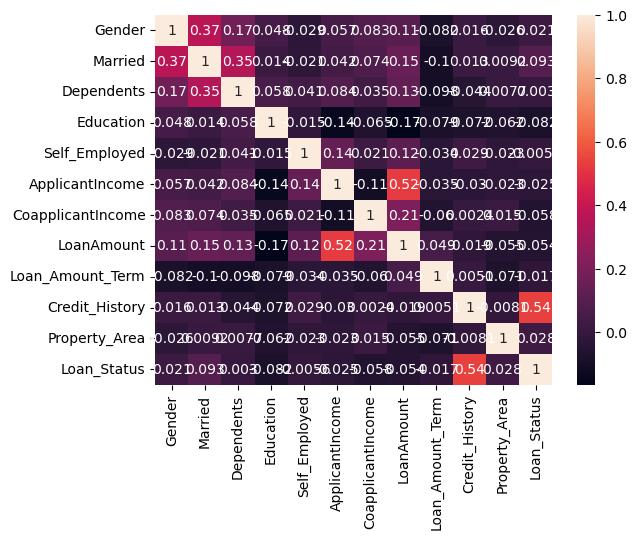

In [21]:
sns.heatmap(data.corr(), annot=True)

In [22]:
data.corr().Loan_Status.sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.535930
Married              0.093183
Property_Area        0.028315
Gender               0.021239
Dependents           0.003008
Self_Employed       -0.005605
Loan_Amount_Term    -0.017305
ApplicantIncome     -0.025248
LoanAmount          -0.054283
CoapplicantIncome   -0.058194
Education           -0.081617
Name: Loan_Status, dtype: float64

In [23]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 4. Division des donnees

In [24]:
# 4. Division des donnees en Variables Indep et Dep
print(data.shape)
X = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

(598, 12)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,train_size=0.75,random_state=35)

In [26]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (448, 11)
X_test: (150, 11)
y_train: (448,)
y_test: (150,)


In [27]:
data['Loan_Status'].unique()

array([1, 0])

In [28]:
X.shape

(598, 11)

In [29]:
y.shape

(598,)

# 5. Construction des Modeles

## 5.1. Logistic Regression

[[24 25]
 [ 3 98]]


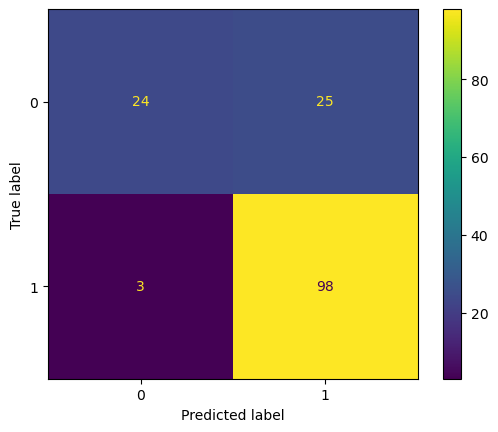

In [30]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)

In [31]:
print("Accuracy de LR:", accuracy_score(y_test, y_pred_lr))
print("Precision de LR:",precision_score(y_test, y_pred_lr))
print("Recall de LR:",recall_score(y_test, y_pred_lr))
print("F1-Score de LR:",f1_score(y_test, y_pred_lr))
print("MSE de LR:",mean_squared_error(y_test, y_pred_lr))

Accuracy de LR: 0.8133333333333334
Precision de LR: 0.7967479674796748
Recall de LR: 0.9702970297029703
F1-Score de LR: 0.875
MSE de LR: 0.18666666666666668


# 5.2. Random Forest

[[26 23]
 [11 90]]


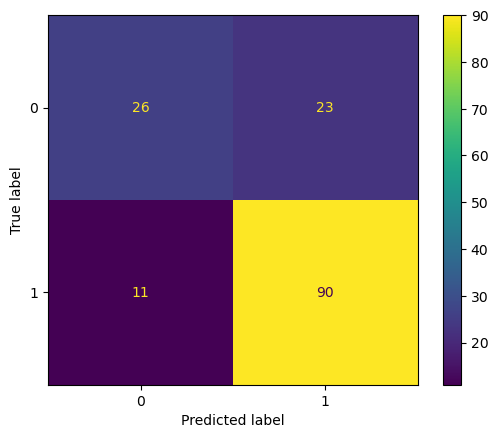

In [32]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)

In [33]:
print("Accuracy de RF:", accuracy_score(y_test, y_pred_rf))
print("Precision de RF:",precision_score(y_test, y_pred_rf))
print("Recall de RF:",recall_score(y_test, y_pred_rf))
print("F1-Score de RF:",f1_score(y_test, y_pred_rf))
print("MSE de RF:",mean_squared_error(y_test, y_pred_rf))

Accuracy de RF: 0.7733333333333333
Precision de RF: 0.7964601769911505
Recall de RF: 0.8910891089108911
F1-Score de RF: 0.8411214953271028
MSE de RF: 0.22666666666666666


# 5.3. KNeighborsClassifier

[[13 36]
 [12 89]]


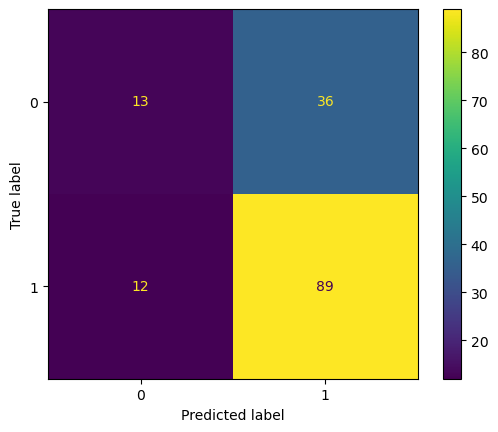

In [34]:
model_knc = KNeighborsClassifier()
model_knc.fit(X_train, y_train)
y_pred_knc = model_knc.predict(X_test)
print(confusion_matrix(y_test, y_pred_knc))
ConfusionMatrixDisplay.from_estimator(model_knc, X_test, y_test)

In [35]:
print("Accuracy de KNC:", accuracy_score(y_test, y_pred_knc))
print("Precision de KNC:",precision_score(y_test, y_pred_knc))
print("Recall de KNC:",recall_score(y_test, y_pred_knc))
print("F1-Score de KNC:",f1_score(y_test, y_pred_knc))
print("MSE de KNC:",mean_squared_error(y_test, y_pred_knc))

Accuracy de KNC: 0.68
Precision de KNC: 0.712
Recall de KNC: 0.8811881188118812
F1-Score de KNC: 0.7876106194690266
MSE de KNC: 0.32


# 5.4. DecisionTreeClassifier

In [36]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred_dtc))

[[29 20]
 [22 79]]


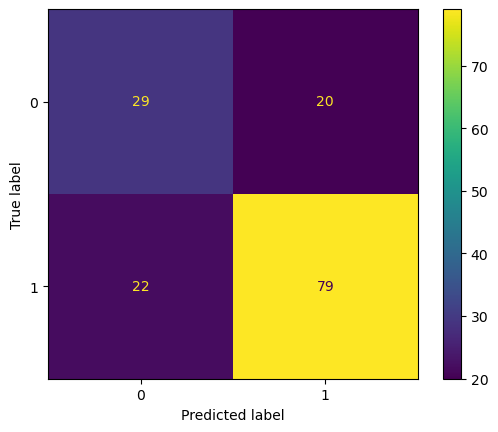

In [37]:
ConfusionMatrixDisplay.from_estimator(model_dtc, X_test, y_test)

[[  0  49]
 [  1 100]]


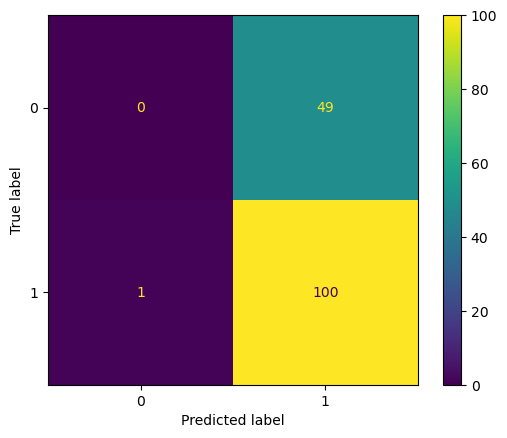

In [38]:
model_svc = SVC()
model_svc.fit(X_train,y_train)
y_pred_svc = model_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc))
ConfusionMatrixDisplay.from_estimator(model_svc, X_test, y_test)

In [39]:
print("Accuracy de SVC:", accuracy_score(y_test, y_pred_svc))
print("Precision de SVC:",precision_score(y_test, y_pred_svc))
print("Recall de SVC:",recall_score(y_test, y_pred_svc))
print("F1-Score de SVC:",f1_score(y_test, y_pred_svc))
print("MSE de SVC:",mean_squared_error(y_test, y_pred_svc))

Accuracy de SVC: 0.6666666666666666
Precision de SVC: 0.6711409395973155
Recall de SVC: 0.9900990099009901
F1-Score de SVC: 0.8
MSE de SVC: 0.3333333333333333


In [40]:
model_svc.predict([[0, 1, 0.0, 1, 0, 7349, 0.0, 233.435463, 360.0, 1.0, 2]])

array([1])